# Project: Analyse @welovedogs tweets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Datasets 
- An archive of @dog_rates tweets was provided by Udacity, it contains some information on the tweets eg tweet_id, text, name, ratings etc.
- A dataset containing the images included in the tweets, and thier image recognition result was also provided


> The following are questions to be explored using this dataset:
><li>Most popular dog name
><li>Most popular dog stage    
><li>Most common dog breeds
><li>Average tweet engagement and Average rating and if they are infleunced by time 
><li>Account growth rate
><li>Dog breeds with the highest rating

<a id='wrangling'></a>

## Data wrangling
<ul>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
</ul>

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
sns.set_style(style='darkgrid')

<a id='gathering'></a>
### Gathering Data

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

Getting Twitter API's access_token and access_secret <br>
The consumer_key and secret are hidden to comply with Twitter's API terms and conditions

In [3]:
consumer_key = 'sVYfTGyNUkedyDsCdhWc54et9'
consumer_secret = 'khGtdnpBZV0WklSWfbFOOWbROhIiMYDso0WVaX5Z79WuXdXuWX'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

access_token = auth.access_token
access_secret = auth.access_token_secret

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Obtaining the `tweet_ids` to use with the twitter api

In [4]:
id = tweets.tweet_id.values

Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [337]:
fails = []
count = 1
with open('tweet-json.txt', 'w') as writefile:
    for x in id:
        print(str(count)+ ': ' + str(x))
        count += 1
        try:
            tweet = api.get_status(x, tweet_mode = 'extended')
            print('success')
            json.dump(tweet._json, writefile)
            writefile.write('\n')
        except tweepy.TweepError as error:
            print('fail')
            fails.append(str(x) + ': ' + str(error))
            pass
            

1: 892420643555336193


KeyboardInterrupt: 

Reading from the json text file created above 

In [5]:
tweet_info = pd.DataFrame()
i_d = []
favorite_count = []
retweet_count = []
followers = []
with open('tweet-json.txt', 'r') as json_data:
    for x in json_data:
        data = json.loads(x)
        i_d.append(data.get('id'))
        favorite_count.append(data.get('favorite_count'))
        retweet_count.append(data.get('retweet_count'))
        followers.append(data.get('user').get('followers_count'))

Writing the data into a dataframe called `tweet_info`

In [6]:
tweet_info['tweet_id'] = i_d
tweet_info['favorite_count'] = favorite_count
tweet_info['retweet_count'] = retweet_count
tweet_info['followers_count'] = followers

In [7]:
tweet_info

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,34952,7334,8990741
1,892177421306343426,30266,5473,8990741
2,891815181378084864,22776,3620,8990741
3,891689557279858688,38227,7524,8990741
4,891327558926688256,36493,8095,8990741
...,...,...,...,...
2326,666049248165822465,93,38,8990852
2327,666044226329800704,259,122,8990852
2328,666033412701032449,106,39,8990852
2329,666029285002620928,117,41,8990852


<a id='assess'></a>

### Assessing Data


In [8]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None,None,None,None
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970...,13,10,None,None,None,None,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661...,13,10,None,None,None,pupper,None


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
tweets.groupby('name').count()['tweet_id']

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: tweet_id, Length: 957, dtype: int64

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_info.describe()

,tweet_id,favorite_count,retweet_count,followers_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,7297.767482,2582.489918,8.990793e+06
std,6.823170e+16,11337.264701,4368.222352,5.050960e+01
min,6.660209e+17,0.000000,1.000000,8.990741e+06
25%,6.782670e+17,1262.000000,524.000000,8.990760e+06
50%,7.182469e+17,3161.000000,1205.000000,8.990789e+06
75%,7.986692e+17,8925.000000,2988.000000,8.990815e+06
max,8.924206e+17,150210.000000,74112.000000,8.991215e+06


In [15]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_count   2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


#### Quality
##### `tweets` table
- Missing dog names in the `name` column
- Retweeted tweets and replies in table
- `Timestamp` column is an object not a datetime 
- Presence of other animals other than dogs 
- wrong `name` (officially, by, the, infuriating, a, quite, not, one, my, actually, all, his, an, mad)
- Some rating denominator values are'nt 10.
- Wrong rating values for `Bretagne`,`Bluebert`,`Darrel`,`Sam`and some others.
- Mistakes in the `rating_numerator` column.
- Missing `dog_stages` info.

##### `image_predictions` table
- No dogs predictions in some of the rows
- Underscore present in the prediction values.


##### `tweet_info` table
- Retweeted tweets and replies in table
- Missing data

#### Tidiness
- One variables in four columns in `tweets` table (pupper, puppo, doggo, and floofer) are all dog_stages
- Multiple columns for dog_breed prediction
- Multiple dataframes when 1 can contain all the data

<a id='cleaning'></a>

### Cleaning Data

Creating new dataframes where the cleaning operations will be performed

In [16]:
tweets_clean = tweets.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

#### Tidiness
`tweets` table
- One variables in four columns in `tweets` table (pupper, puppo, doggo, and floofer) are all dog_stages<br>

**Define** <br>
Create a function to merge the four columns into 1 and delete them.

**Code**

In [17]:
def dog_stage (a,b,c,d):
    if a == 'doggo':
        return (a)
    elif b == 'floofer':
        return (b)
    elif c == 'pupper':
        return (c)
    elif d == 'puppo':
        return (d)
    else:
        return(np.nan)

In [18]:
dog_stages = map(dog_stage,tweets_clean['doggo'],tweets_clean['floofer'],tweets_clean['pupper'],tweets_clean['puppo'])

In [19]:
tweets_clean['dog_stages'] = list(dog_stages)

In [20]:
tweets_clean = tweets_clean.drop(columns=['doggo','floofer','pupper','puppo'])

**Test**

In [21]:
tweets_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Quality
`tweets` table
- Retweeted tweets and replies in table<br>

**Define** <br>
Remove the retweets and replies from the dataframe.

**Code**

In [22]:
tweets_clean = tweets_clean.query('in_reply_to_status_id != in_reply_to_status_id and retweeted_status_id != retweeted_status_id')

In [23]:
tweets_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace= True)

**Test**

In [24]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stages          336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### Quality
`tweets` table
- Timestamp column is an object not a datetime<br>

**Define** <br>
Change timestamp datatype to datetime using pandas `to_datetime` function.

**Code**

In [25]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean.timestamp)

**Test**

In [26]:
tweets_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN


#### Quality
`tweets` table
- Missing dog names in the name column
- Wrong name (officially, by, the, infuriating, a, quite, not, one, my, actually, all, his, an, mad)<br>

**Define** <br>
Create function to get all dog names after string `name is` and `named` in the text column.<br>
Prevent words such as `a`,`an`,`by`,`not`,`my` etc from being in the name column.<br>
All words('a','an','by','not','my','life','old','just','very', 'this','light','getting','unacceptable','space','None','officially','the','infuriating','such','quite', 'one', 'actually', 'all', 'his','incredibly','mad')


**Code**

In [27]:
def get (data):
    indexes =[]
    names =[]
    for index,df in data.iterrows():
        name = re.findall(r'(?<=\bThis is\s)([A-Z]\w+)| (?<=\bname is\s)([A-Z]\w+)|(?<=\bnamed\s)([A-Z]\w+)|(?<=\bMeet\s)([A-Z]\w+)|(?<=\bHere is\s)([A-Z]\w+)|(?<=\bhello to\s)([A-Z]\w+)|(?<=\bthis is\s)([A-Z]\w+)' ,df['text']) 
        for x in name:
            indexes.append(index)
            strin = re.findall(r'(\w+)', str(x))
            names.append(strin[0])
    return indexes,names

In [28]:
index, names = get(tweets_clean)
new_name = pd.DataFrame(index = index, data=names ,columns=['name'])
new_name

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
...,...
2315,Christoper
2317,Jimothy
2318,Kreggory
2319,Scout


In [29]:
tweets_clean.drop(columns=['name'],inplace=True)
tweets_clean = tweets_clean.merge(new_name,left_index=True,right_index=True,how = 'left')

In [30]:
tweets_clean.drop_duplicates(subset =['tweet_id'],inplace=True)

**Test**

In [31]:
tweets_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,Franklin
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN


#### Quality
`tweets` table
- Presence of other animals other than dogs<br>

**Define** 
Get all rows that do not contain dogs and drop them<br>


**Code**

In [32]:
non_dogs = (tweets_clean[(tweets_clean['text'].str.contains('We only rate dogs')) | 
                         (tweets_clean['text'].str.contains('Please only send dogs')) | 
                         (tweets_clean['text'].str.contains('please only send dogs')) | 
                         (tweets_clean['text'].str.contains('we only rate dogs')) | 
                         (tweets_clean['text'].str.contains('2 legs')) |
                         (tweets_clean['text'].str.contains('please only send in dogs')) |
                         (tweets_clean['text'].str.contains('Please only send in dogs'))])

In [33]:
tweets_clean.drop(non_dogs.index,inplace=True)

**Test**

In [34]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2034 non-null   int64              
 1   timestamp           2034 non-null   datetime64[ns, UTC]
 2   source              2034 non-null   object             
 3   text                2034 non-null   object             
 4   expanded_urls       2031 non-null   object             
 5   rating_numerator    2034 non-null   int64              
 6   rating_denominator  2034 non-null   int64              
 7   dog_stages          336 non-null    object             
 8   name                1420 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 158.9+ KB


#### Quality
`tweets` table
- Some rating denominator values are'nt 10
- Wrong rating values for `Bretagne`,`Bluebert`,`Darrel`,`sam`and some others
- Mistakes in the `rating_numerator` column.<br>

**Define**<br>
Change the mistakes made in some of the column manually.<br>
Create a function to correct the other mistakes <br>


**Code**

In [35]:
tweets_clean[(tweets_clean['rating_denominator'] != 10) | (tweets_clean['rating_numerator'] >= 16)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,Sam
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,NaN,Logan
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,pupper,Sophie
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,NaN,Atticus
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,Bretagne
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,NaN,Bluebert


In [36]:
#Darrel is rated 10/10
tweets_clean.loc[1662,['rating_numerator','rating_denominator']] = 10,10

In [37]:
# Bluebert is rated 11/10
tweets_clean.loc[1202,['rating_numerator','rating_denominator']] = 11,10

In [38]:
#Bretagne is rated 14/10
tweets_clean.loc[1068,['rating_numerator','rating_denominator']] = 14,10 

In [39]:
# `666287406224695296` is rated 9/10
tweets_clean.loc[2335,['rating_numerator','rating_denominator']] = 9,10 

In [40]:
# Logan is rated 9.75/10 approximately 10/10
tweets_clean.loc[695,['rating_numerator','rating_denominator']] = 10,10 

In [41]:
# sophie is rated 11.27/10 approximately 11/10
tweets_clean.loc[763,['rating_numerator','rating_denominator']] = 11,10 

In [42]:
# `680494726643068929` is rated 11.26/10  approximately 11/10
tweets_clean.loc[1712,['rating_numerator','rating_denominator']] = 11,10 

In [43]:
# `722974582966214656` is rated 13/10
tweets_clean.loc[1165,['rating_numerator','rating_denominator']] = 13,10 

In [44]:
# sam has no rating drop sam 
tweets_clean.drop(516,inplace=True)

In [45]:
 tweets_clean[(tweets_clean['rating_denominator'] != 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN
1228,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,NaN
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN
1351,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,NaN
1433,697463031882764288,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,NaN,NaN
1635,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,NaN,NaN
1779,677716515794329600,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,NaN,NaN


In [46]:
def ratings_numerator (data):
    new_numer = []
    for index,df in data.iterrows():
        if df.rating_denominator > 10 :
            div = int(str(df.rating_denominator)[:-1])
            new= df.rating_numerator/div
            new_numer.append(new)
        else:
            new_numer.append(df.rating_numerator)
    return new_numer       

In [47]:
tweets_clean['rating_numerator'] = ratings_numerator(tweets_clean)

In [48]:
tweets_clean['rating_denominator'] = tweets_clean['rating_denominator'].apply(lambda x: x/int(str(x)[:-1]) if x >10 else x)

**Test**

In [49]:
tweets_clean[(tweets_clean['rating_denominator'] != 10) | (tweets_clean['rating_numerator'] >= 16)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,NaN,Atticus
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,NaN,NaN


In [50]:
tweets_clean.reset_index(drop = True,inplace=True)

#### Quality
`tweets` table
- Missing `dog_stages` info.

**Define**<br>
Some dog stages were not extracted because the occured in plural form. Extract those stages and add them to the `dog_stages` column<br>


**Code**

In [51]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2033 non-null   int64              
 1   timestamp           2033 non-null   datetime64[ns, UTC]
 2   source              2033 non-null   object             
 3   text                2033 non-null   object             
 4   expanded_urls       2030 non-null   object             
 5   rating_numerator    2033 non-null   float64            
 6   rating_denominator  2033 non-null   float64            
 7   dog_stages          336 non-null    object             
 8   name                1419 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 143.1+ KB


In [52]:
for i,y in tweets_clean.iterrows():
    if 'doggos' in y['text']:
        tweets_clean.at[i,'dog_stages'] = 'doggo'
    elif 'puppers' in y['text']:
        tweets_clean.at[i,'dog_stages'] = 'pupper'
    elif 'puppos' in y['text']:
        tweets_clean.at[i,'dog_stages'] = 'puppo'

In [53]:
 tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2033 non-null   int64              
 1   timestamp           2033 non-null   datetime64[ns, UTC]
 2   source              2033 non-null   object             
 3   text                2033 non-null   object             
 4   expanded_urls       2030 non-null   object             
 5   rating_numerator    2033 non-null   float64            
 6   rating_denominator  2033 non-null   float64            
 7   dog_stages          367 non-null    object             
 8   name                1419 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 143.1+ KB


#### Quality
`image_predictions` table
- No dogs predictions in some of the rows


#### Tidyness
`image_predictions` table
- Only one column needed for dog_breed prediction
<br>

**Define**<br>
Write a function to get the first correct dog prediction and use that prediction as the breed of the dog. <br>
Drop null values.<br>
Drop p1,p2,p3,their respective confidence and dog columns


**Code**

In [54]:
def breed (dataframe):
    breed = []
    for index,df in dataframe.iterrows():
        if df.p1_dog == True:
            breed.append(df.p1)
        elif df.p2_dog == True:
            breed.append(df.p2)
        elif df.p3_dog == True:
            breed.append(df.p3)
        else:
            breed.append(np.nan)
    return breed

In [55]:
image_predictions_clean['dog_breed'] = breed(image_predictions_clean)

In [56]:
image_predictions_clean.dropna(subset=['dog_breed'],inplace=True)

In [57]:
image_predictions_clean.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace=True)

**Test**

In [58]:
image_predictions_clean

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua


#### Quality
`image_predictions` table
- Underscore present in the prediction values.

**Define**<br>
Use `str.title()` and `str.replace` to remove the underscore and the capitalize each word <br>



**Code**


In [59]:
image_predictions_clean['dog_breed']= image_predictions_clean['dog_breed'].str.title().str.replace('_',' ')

**Test**

In [60]:
image_predictions_clean

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua


#### Quality
`tweet_info` table
- Retweeted tweets and replies in table
- Missing data<br>

#### Tidyness
`tweets` table

- Multiple dataframes when 1 can contain all the data
<br>

**Define**<br>
Merge all tables together on the `tweet_id` column<br>


**Code**

 

In [61]:
master_df = tweets_clean.merge(tweet_info_clean,on='tweet_id').merge(image_predictions_clean[['tweet_id','dog_breed']],on='tweet_id')

**Test**

In [62]:
master_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name,favorite_count,retweet_count,followers_count,dog_breed
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,Tilly,30266,5473,8990741,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,Archie,22776,3620,8990741,Chihuahua
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,Darla,38227,7524,8990741,Labrador Retriever
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,Franklin,36493,8095,8990741,Basset
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,18415,2713,8990741,Chesapeake Bay Retriever
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,93,38,8990852,Miniature Pinscher
1602,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,259,122,8990852,Rhodesian Ridgeback
1603,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,106,39,8990852,German Shepherd
1604,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,117,41,8990852,Redbone


<a id='eda'></a>

## Exploratory Data Analysis

### Research Question 1: Most popular and least popular dog names.

In [63]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name,favorite_count,retweet_count,followers_count,dog_breed
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,Tilly,30266,5473,8990741,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,Archie,22776,3620,8990741,Chihuahua
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,Darla,38227,7524,8990741,Labrador Retriever
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,Franklin,36493,8095,8990741,Basset
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,18415,2713,8990741,Chesapeake Bay Retriever


- Grouping the dataframe by the names of the dogs and counting the number of occurences of each name
- Sorting the values so that the most popular appears on top and the least popular at the bottom. 

In [64]:
dog_names = master_df.groupby(['name']).count()['tweet_id']

In [65]:
dog_names= dog_names.sort_values(ascending =False)
dog_names

name
Cooper     10
Oliver      9
Tucker      9
Lucy        9
Charlie     9
           ..
Gromit      1
Gunner      1
Guss        1
Gustaf      1
Zooey       1
Name: tweet_id, Length: 850, dtype: int64

Plotting a bar chart to show results

In [66]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k =10)

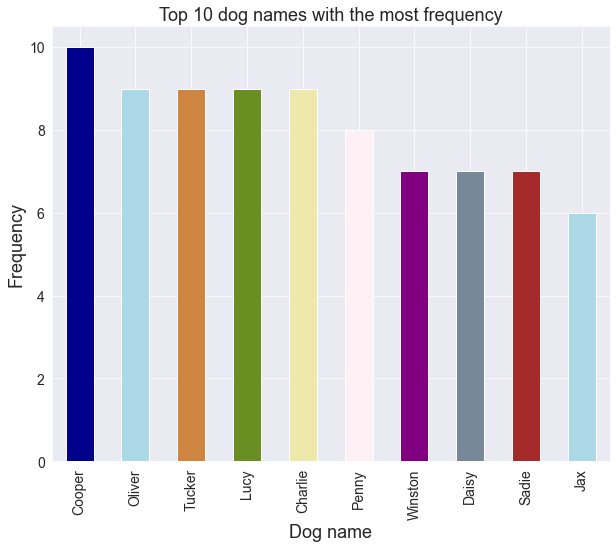

In [67]:
dog_names.iloc[:10].plot.bar(figsize = (10,8),color=c)
plt.xlabel('Dog name', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Top 10 dog names with the most frequency', fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14);

Dog names that occur only once

In [68]:
dog_names[dog_names == 1]

name
Pippin    1
Opie      1
Ozzy      1
Ozzie     1
Luther    1
         ..
Gromit    1
Gunner    1
Guss      1
Gustaf    1
Zooey     1
Name: tweet_id, Length: 666, dtype: int64

Average retweet count,favorite count and ratings for the top ten rated dogs

In [69]:
master_df.groupby(['name']).mean().loc[dog_names.iloc[:10].index] 

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count
name,,,,,,
Cooper,7.588834e+17,11.300000,10.0,6101.700000,1570.700000,8.990777e+06
Oliver,7.468092e+17,11.333333,10.0,6044.333333,1576.444444,8.990783e+06
Tucker,7.701575e+17,12.000000,10.0,7605.888889,1821.444444,8.990775e+06
Lucy,7.391712e+17,11.222222,10.0,8581.777778,2758.777778,8.990784e+06
Charlie,7.623754e+17,11.666667,10.0,8950.000000,2212.333333,8.990776e+06
Penny,7.635415e+17,11.000000,10.0,10924.875000,3177.250000,8.990780e+06
Winston,7.618126e+17,10.571429,10.0,8863.428571,2263.285714,8.990779e+06
Daisy,7.618166e+17,11.857143,10.0,8476.428571,2072.571429,8.990781e+06
Sadie,7.151968e+17,10.285714,10.0,5312.000000,1325.142857,8.990794e+06


### Research Question 2: Most popular dog stage

Get all dog stages that aren't equal to nan<br>

In [70]:
stages_plot = master_df[master_df['dog_stages'] == master_df['dog_stages']].groupby(['dog_stages']).count()['tweet_id']

In [71]:
stages_plot.index = stages_plot.index.str.title()
stages_plot

dog_stages
Doggo       66
Floofer      7
Pupper     181
Puppo       21
Name: tweet_id, dtype: int64

Plotting a pie chart to show results

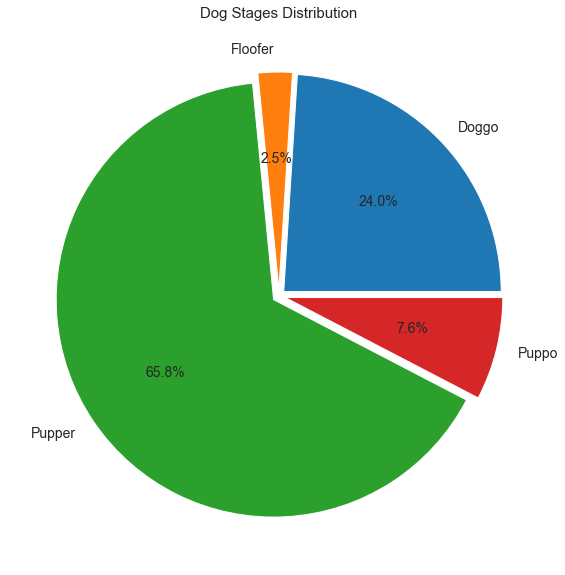

In [72]:
pie, ax = plt.subplots(figsize= [10,10])
labels = stages_plot.keys()
plt.pie(x=stages_plot, autopct="%.1f%%", explode=[0.03]*4, labels=labels, pctdistance=0.6,textprops={'fontsize':14})
plt.title("Dog Stages Distribution", fontsize=15);

Average retweet count,favorite count and ratings for dog stages

In [73]:
 master_df[master_df['dog_stages'] == master_df['dog_stages']].groupby(['dog_stages']).mean()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count
dog_stages,,,,,,
doggo,7.986528e+17,11.772727,10.0,17620.348485,5871.757576,8.990763e+06
floofer,7.665514e+17,12.000000,10.0,11619.714286,4153.142857,8.990776e+06
pupper,7.192243e+17,10.845304,10.0,6447.513812,1962.861878,8.990797e+06
puppo,8.103328e+17,11.952381,10.0,20200.857143,5491.142857,8.990760e+06


### Research Question 3: Most common dog breeds.

In [74]:
common_breeds = master_df.groupby(['dog_breed']).count()['tweet_id'].sort_values(ascending=False)

In [75]:
common_breeds.head(10)

dog_breed
Golden Retriever      152
Labrador Retriever     98
Pembroke               91
Chihuahua              89
Pug                    59
Toy Poodle             49
Chow                   45
Pomeranian             41
Samoyed                38
Malamute               32
Name: tweet_id, dtype: int64

Plotting a Dot plot to show results

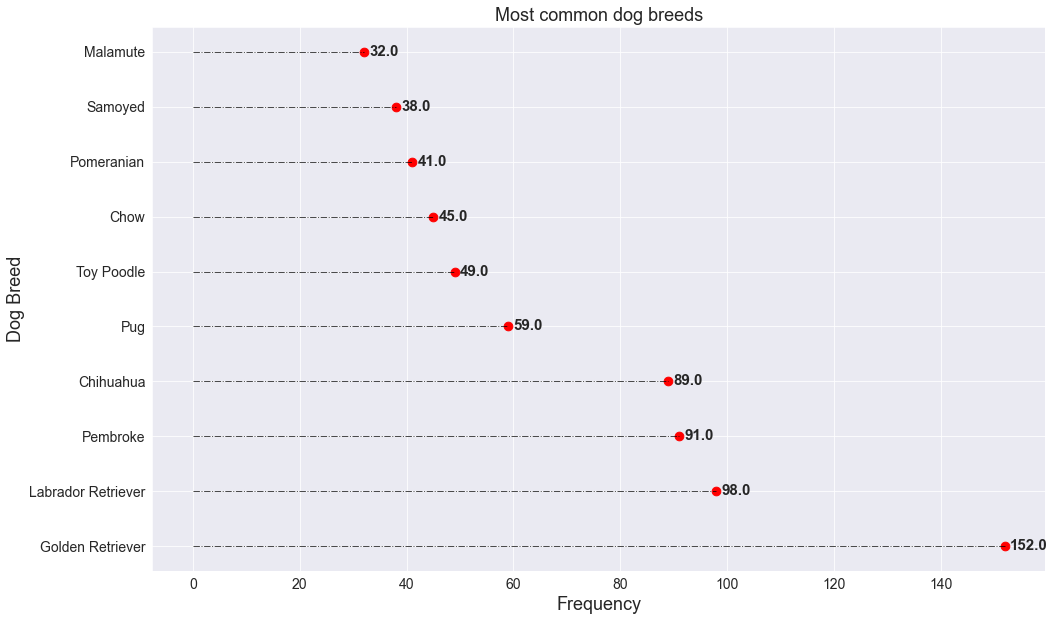

In [76]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,10))
ax.hlines(y=common_breeds[:10].index, xmin=0, xmax=[common_breeds[:10]], color='black', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=common_breeds[:10].index, x=common_breeds[:10], s=75, color='red')
plt.title('Most common dog breeds',fontsize= 18)
plt.xlabel('Frequency', fontsize = 18)
plt.ylabel('Dog Breed', fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14);
for i, val in enumerate(common_breeds[:10].values):
    plt.text(val+1, i, float(val), horizontalalignment='left', verticalalignment='center', fontdict={'fontweight':600, 'size':15})

Average retweet count,favorite count and ratings for dog breeds

In [77]:
 master_df.groupby(['dog_breed']).mean().loc[common_breeds[:10].index]

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count
dog_breed,,,,,,
Golden Retriever,7.562204e+17,11.552632,10.0,11059.217105,3188.000000,8.990782e+06
Labrador Retriever,7.475461e+17,11.224490,10.0,10079.479592,3016.571429,8.990786e+06
Pembroke,7.545754e+17,11.428571,10.0,9964.219780,2642.373626,8.990783e+06
Chihuahua,7.193979e+17,10.516854,10.0,7446.325843,2388.000000,8.990804e+06
Pug,7.192311e+17,10.288136,10.0,5591.101695,1637.576271,8.990799e+06
Toy Poodle,7.204677e+17,10.979592,10.0,5806.224490,1902.755102,8.990805e+06
Chow,7.413433e+17,11.377778,10.0,6761.800000,1898.844444,8.990788e+06
Pomeranian,7.183631e+17,10.951220,10.0,6944.170732,2329.585366,8.990798e+06
Samoyed,7.445126e+17,11.710526,10.0,10709.736842,3706.473684,8.990785e+06


### Research Question 4: Average tweet engagement and Average rating and if they are infleunced by time.


In [78]:
master_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,name,favorite_count,retweet_count,followers_count,dog_breed
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,NaN,Tilly,30266,5473,8990741,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,NaN,Archie,22776,3620,8990741,Chihuahua
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,NaN,Darla,38227,7524,8990741,Labrador Retriever
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,NaN,Franklin,36493,8095,8990741,Basset
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,18415,2713,8990741,Chesapeake Bay Retriever
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,93,38,8990852,Miniature Pinscher
1602,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,259,122,8990852,Rhodesian Ridgeback
1603,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,106,39,8990852,German Shepherd
1604,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,117,41,8990852,Redbone


In [79]:
months = master_df.groupby(pd.Grouper(key='timestamp', freq='M')).mean().reset_index()

In [80]:
months

,timestamp,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count
0,2015-11-30 00:00:00+00:00,6.686216e+17,9.444444,10.0,1031.653333,400.644444,8.990848e+06
1,2015-12-31 00:00:00+00:00,6.760381e+17,10.080292,10.0,3327.474453,1340.722628,8.990821e+06
2,2016-01-31 00:00:00+00:00,6.879587e+17,10.402985,10.0,3430.753731,1215.925373,8.990813e+06
3,2016-02-29 00:00:00+00:00,6.992185e+17,10.461538,10.0,3272.307692,1104.307692,8.990801e+06
4,2016-03-31 00:00:00+00:00,7.092907e+17,10.617647,10.0,3842.343137,1259.803922,8.990791e+06
5,2016-04-30 00:00:00+00:00,7.203873e+17,10.574468,10.0,4237.042553,1368.468085,8.990796e+06
6,2016-05-31 00:00:00+00:00,7.314065e+17,11.088889,10.0,5542.288889,1813.333333,8.990788e+06
7,2016-06-30 00:00:00+00:00,7.434617e+17,10.338710,10.0,10052.209677,3960.467742,8.990785e+06
8,2016-07-31 00:00:00+00:00,7.536898e+17,10.831169,10.0,6317.753247,2125.142857,8.990779e+06
9,2016-08-31 00:00:00+00:00,7.656858e+17,11.173913,10.0,8335.065217,2521.760870,8.990772e+06


Plotting a multiple Time series plot to show results

<ipython-input-92-7fe29cf2c01b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation= 60,fontdict={'fontsize':12},color='black')


Text(0.5, 1.0, 'Retweet and Favorite counts over time')

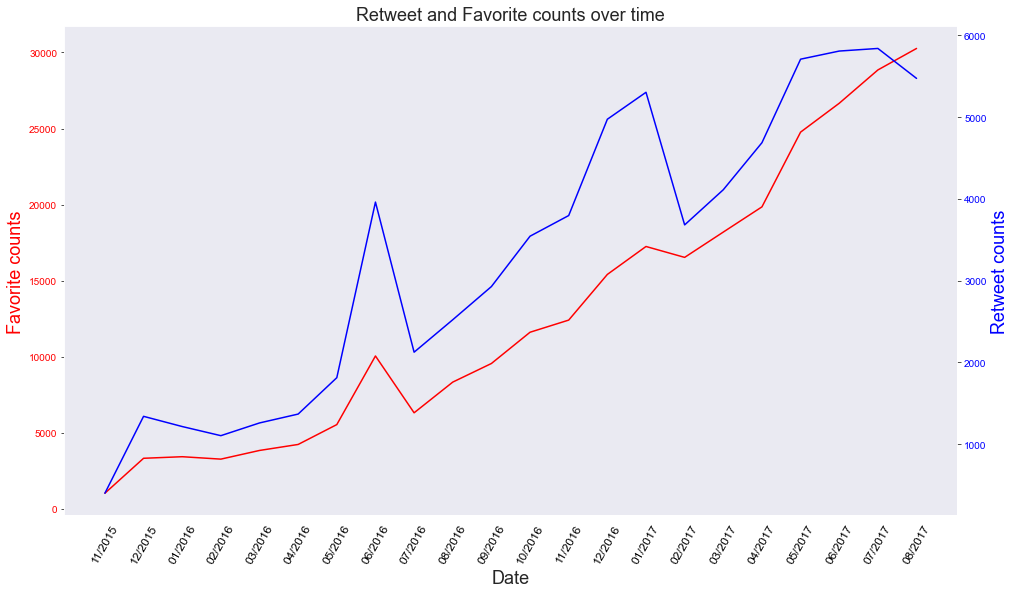

In [92]:
x = months['timestamp'].dt.strftime('%m/%Y')
y1 = months['favorite_count']
y2 = months['retweet_count']

sns.set_style(style='dark')

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9))
ax1.plot(x, y1, color='red')

ax1.set_xlabel('Date',fontsize = 18)
ax1.set_xticklabels(x,rotation= 60,fontdict={'fontsize':12},color='black')
ax1.set_ylabel('Favorite counts',fontsize = 18,color = 'red')
ax1.tick_params(axis ='y',labelcolor = 'red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='blue')

ax2.set_ylabel('Retweet counts',fontsize = 18,color = 'blue')
ax2.tick_params(axis ='y',labelcolor = 'blue')

plt.title('Retweet and Favorite counts over time', fontsize= 18)

Plotting a time series plot for average rating

<ipython-input-96-f5bf35b277ae>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation= 60,fontdict={'fontsize':12})


Text(0.5, 1.0, 'Average ratings over time')

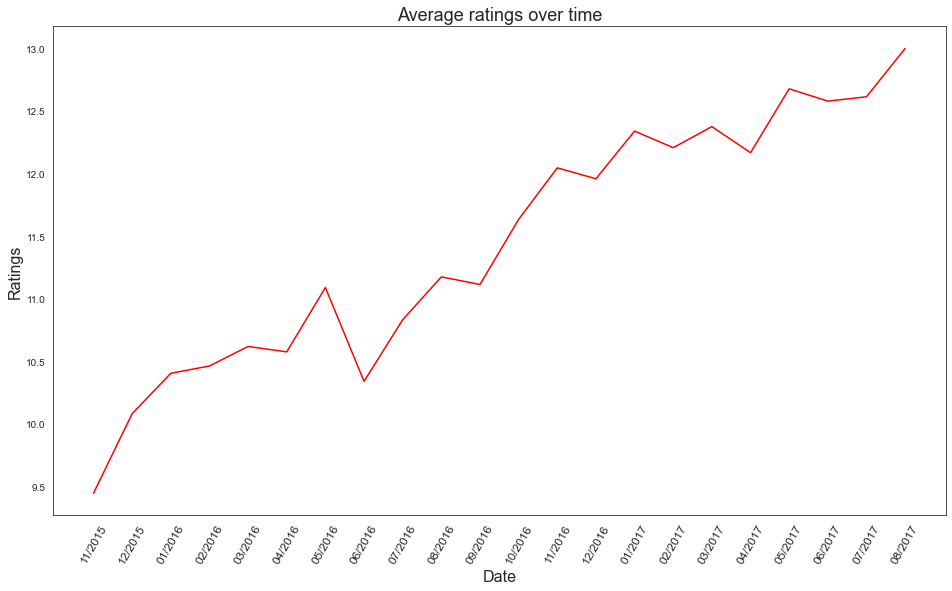

In [96]:
x = months['timestamp'].dt.strftime('%m/%Y')
y3 = months['rating_numerator']

sns.set_style(style ='white')

fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.plot(x, y3, color='red')
ax.set_xlabel('Date',fontsize= 16)
ax.set_xticklabels(x,rotation= 60,fontdict={'fontsize':12})
ax.set_ylabel('Ratings',fontsize = 16)

plt.title('Average ratings over time', fontsize= 18)

### Research Question 5: Account growth rate.


In [95]:
months[['timestamp','followers_count']]

,timestamp,followers_count
0,2015-11-30 00:00:00+00:00,8.990848e+06
1,2015-12-31 00:00:00+00:00,8.990821e+06
2,2016-01-31 00:00:00+00:00,8.990813e+06
3,2016-02-29 00:00:00+00:00,8.990801e+06
4,2016-03-31 00:00:00+00:00,8.990791e+06
5,2016-04-30 00:00:00+00:00,8.990796e+06
6,2016-05-31 00:00:00+00:00,8.990788e+06
7,2016-06-30 00:00:00+00:00,8.990785e+06
8,2016-07-31 00:00:00+00:00,8.990779e+06
9,2016-08-31 00:00:00+00:00,8.990772e+06


Percentage of followers lost/gained from 11/2015 to 08/2017

In [121]:
(round(months.loc[21,'followers_count']) - round(months.loc[0,'followers_count']))/round(months.loc[21,'followers_count'])

-1.1901132509545098e-05

In [111]:
round(months.loc[21,'followers_count'])

8990741

<ipython-input-99-428f7854d7ad>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation= 60,fontdict={'fontsize':12})


Text(0.5, 1.0, 'Account followers growth rate')

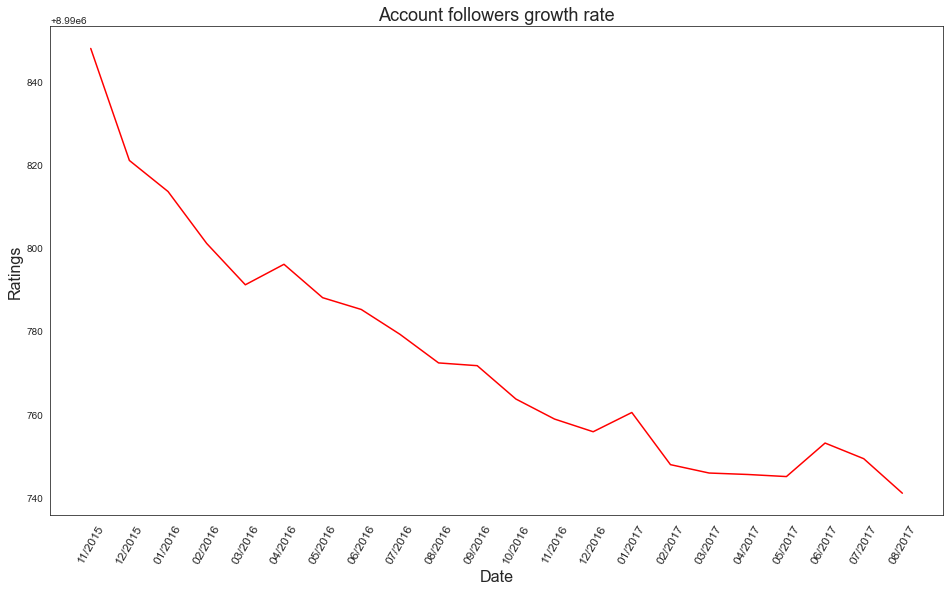

In [99]:
x = months['timestamp'].dt.strftime('%m/%Y')
y4 = months['followers_count']

sns.set_style(style ='white')

fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.plot(x, y4, color='red')
ax.set_xlabel('Date',fontsize= 16)
ax.set_xticklabels(x,rotation= 60,fontdict={'fontsize':12})
ax.set_ylabel('Ratings',fontsize = 16)

plt.title('Account followers growth rate', fontsize= 18)